# Resonator network

In [1]:
using Plots, Images
using LinearAlgebra

In [2]:
function rescale01(M::AbstractArray)
    maxabs = maximum(abs.(M))
    (M.+maxabs)./(2*maxabs)
end

rescale01 (generic function with 1 method)

In [3]:
colnorm(A::Matrix{<:Number}) = [norm(A[:,k]) for k=1:size(A,2)]

function colnormalize!(A::Matrix{<:Number})
    for k = 1:size(A,2)
        A[:,k] = normalize(A[:,k])
    end
end

colnormalize! (generic function with 1 method)

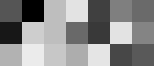

In [47]:
N = 7
D = 3
A = randn(N,D);
colnormalize!(A)
Apinv = pinv(A)

Gray.(rescale01(A)')

In [48]:
display(A'*A)

3×3 Matrix{Float64}:
  1.0         0.0113158  -0.346121
  0.0113158   1.0        -0.176325
 -0.346121   -0.176325    1.0

In [78]:
t0 = normalize(randn(N))
t0 = A[:,rand(1:size(A,2))] + randn(size(A,1))/10
t1 = deepcopy(t0);

In [79]:
Apinv*t1

3-element Vector{Float64}:
 -0.13619427966415645
  0.050021966237926783
  0.8810777107971667

In [80]:
for n = 1:5
    println((Apinv*t1)')
    t1 = normalize(A*(pinv(A)*t1))
end

[-0.13619427966415645 0.050021966237926783 0.8810777107971667]
[-0.14646071206854827 0.053792661573904034 0.947494044752022]
[-0.14646071206854805 0.05379266157390381 0.947494044752022]
[-0.14646071206854785 0.053792661573903604 0.9474940447520223]
[-0.14646071206854758 0.05379266157390327 0.9474940447520221]


In [41]:
A'*t1

3-element Vector{Float64}:
 0.4265896775630394
 0.7435430734801733
 0.030821471124540506